## Model Representation
<img align="left" src="../images/C1_W1_L3_S1_Lecture_b.png"    style=" width:96%; height:250px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L3_S1_trainingdata.png"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L3_S1_model.png"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L3_S2_Lecture_b.png"    style=" width:96%; height:250px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:96%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L4_S1_Lecture_GD.png"    style=" width:96%; height:250px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab03_lecture_slopes.PNG"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab03_lecture_learningrate.PNG"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab03_alpha_too_big.PNG"    style=" width:96%; height:250px; padding: 10px;  " />

In [17]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients, plt_stationary, plt_update_onclick, soup_bowl

In [18]:
df = pd.read_csv('./data.csv')
df.columns = df.columns.str.lower().str.replace(' ','_')

list_of_head = list(df.dtypes[df.dtypes != 'object'].index)
# list_of_head
df['engine_hp'].fillna(round(df['engine_hp'].mean(),2),inplace=True)
x_feature = df['engine_hp'].iloc[:100]
y_target = df['msrp'].iloc[:100]
# df['msrp'].isnull().sum()
# for col in list_of_head:
#     df[col] = df[col].str.lower().str.replace(' ', '_')
# for col in df.columns:
#     print(df[col].unique()[:5])
#     print(df[col].nunique())
#     print()
# x_feature

In [19]:
## Cost function 
w11 = 100
b11 = 51
x11 = np.array([1.0, 2.0, 3.0])
y11 = np.array([150, 250, 350])
def cost_function(x, y, w, b):
    # print(x)
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = (w * x[i]) + b
        cost += (f_wb - y[i]) ** 2
    j_wb = (1/(2*m)) * cost
    return j_wb
# cost_function(x11, y11, w11, b11)
# print(j_wb)

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [20]:
### Compute gradient
def gradient_deriv(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = (w * x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db
# gradient_deriv(x11, y11, w11, b11)

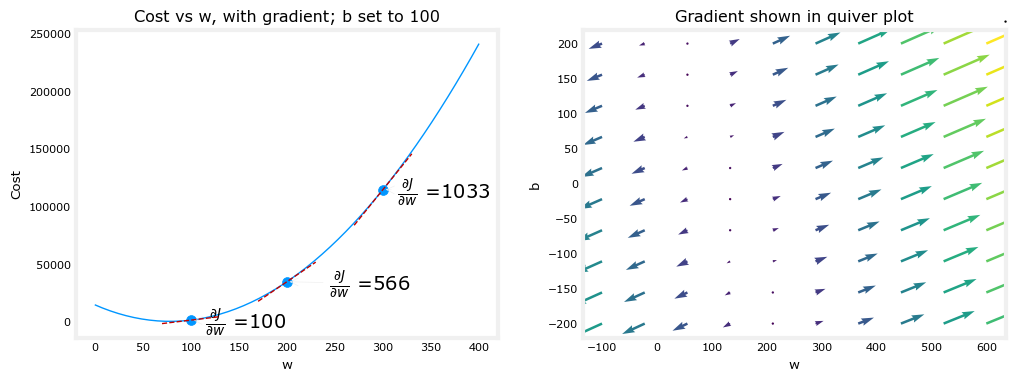

In [6]:
plt_gradients(x11,y11, cost_function, gradient_deriv)
plt.show()

In [25]:
# Computing gradient descent
def gradient_descent(x, y, w_ini, b_ini, alpha, num_iteration, cost_func, grad_deriv):
    w = w_ini
    b = b_ini
    cost_hist = []
    coef_hist = []

    for i in range(num_iteration):
        dj_dw, dj_db = grad_deriv(x, y, w, b)

        w += -(alpha * dj_dw) 
        b += -(alpha * dj_db)

        if i<num_iteration:
            cost_hist.append(cost_func(x, y, w, b))
            coef_hist.append([w, b])
        if i% math.ceil(num_iteration/10) == 0:
            print(f"Iteration - {i:4} : cost - {cost_hist[-1]:0.3f}", f"  dj_dw - {dj_dw: 0.2f} : dj_db - {dj_db: 0.2f}", f"w: {w: 0.3f}, b:{b: 0.3f}")
    return w, b

In [26]:
w_init = 0
b_init = 0
tmp_alpha = 0.01
iterations = 10000

w_final, b_final = gradient_descent(x11, y11, w_init, b_init, tmp_alpha, iterations, cost_function, gradient_deriv)
print(f"(w,b) found by gradient descent: ({w_final:0.4f},{b_final:0.4f})")

Iteration -    0 : cost - 30853.606   dj_dw - -566.67 : dj_db - -250.00 w:  5.667, b: 2.500
Iteration - 1000 : cost - 0.164   dj_dw -  0.08 : dj_db - -0.18 w:  100.665, b: 48.489
Iteration - 2000 : cost - 0.015   dj_dw -  0.02 : dj_db - -0.05 w:  100.200, b: 49.546
Iteration - 3000 : cost - 0.001   dj_dw -  0.01 : dj_db - -0.02 w:  100.060, b: 49.864
Iteration - 4000 : cost - 0.000   dj_dw -  0.00 : dj_db - -0.00 w:  100.018, b: 49.959
Iteration - 5000 : cost - 0.000   dj_dw -  0.00 : dj_db - -0.00 w:  100.005, b: 49.988
Iteration - 6000 : cost - 0.000   dj_dw -  0.00 : dj_db - -0.00 w:  100.002, b: 49.996
Iteration - 7000 : cost - 0.000   dj_dw -  0.00 : dj_db - -0.00 w:  100.000, b: 49.999
Iteration - 8000 : cost - 0.000   dj_dw -  0.00 : dj_db - -0.00 w:  100.000, b: 50.000
Iteration - 9000 : cost - 0.000   dj_dw -  0.00 : dj_db - -0.00 w:  100.000, b: 50.000
(w,b) found by gradient descent: (100.0000,50.0000)
